<a href="https://colab.research.google.com/github/hermit7999/ML_basic/blob/main/3_Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from google.colab import drive
mountpoint = '/sample_data'
drive.mount(mountpoint, force_remount = True)

Mounted at /sample_data


#3. Polynomial Regression

공부 시간에 따른 시험 점

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [28]:
dataset = pd.read_csv('/content/PolynomialRegressionData.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

##3-1 단순 선형 회기(Simple Linear Regression)

In [29]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

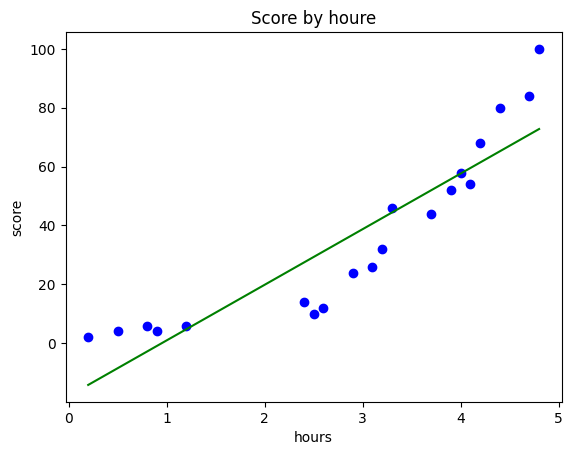

In [30]:
plt.scatter(x,y,color='blue')
plt.plot(x, reg.predict(x), color='green')
plt.title('Score by houre')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [31]:
reg.score(x,y)

0.8169296513411765

## 3-2. Polynomial Regression


In [32]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
x_poly = poly_reg.fit_transform(x)
x_poly[:5], x[:5]

(array([[1.0000e+00, 2.0000e-01, 4.0000e-02, 8.0000e-03, 1.6000e-03],
        [1.0000e+00, 5.0000e-01, 2.5000e-01, 1.2500e-01, 6.2500e-02],
        [1.0000e+00, 8.0000e-01, 6.4000e-01, 5.1200e-01, 4.0960e-01],
        [1.0000e+00, 9.0000e-01, 8.1000e-01, 7.2900e-01, 6.5610e-01],
        [1.0000e+00, 1.2000e+00, 1.4400e+00, 1.7280e+00, 2.0736e+00]]),
 array([[0.2],
        [0.5],
        [0.8],
        [0.9],
        [1.2]]))

In [33]:
poly_reg.get_feature_names_out()

array(['1', 'x0', 'x0^2', 'x0^3', 'x0^4'], dtype=object)

In [34]:
lin_reg = LinearRegression()
lin_reg.fit(x_poly,y)

LinearRegression()

## Data Visualization

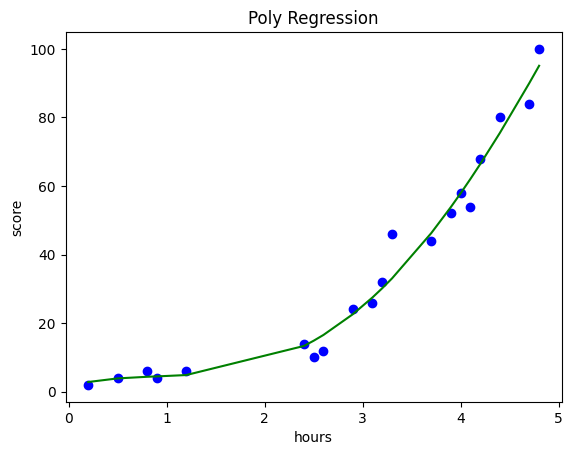

In [35]:
plt.scatter(x,y,color = 'blue')
plt.plot(x, lin_reg.predict(poly_reg.fit_transform(x)), color='green')
plt.title('Poly Regression')
plt.xlabel('hours')
plt.ylabel('score')
plt.show();

In [36]:
x_range = np.arange(min(x), max(x), 0.1) # x의 최소값에서 최대값 까지 0.1 단위로 만듦
x_range

<ipython-input-36-db603734079d>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_range = np.arange(min(x), max(x), 0.1) # x의 최소값에서 최대값 까지 0.1 단위로 만듦


array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4,
       1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7,
       2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. ,
       4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7])

In [37]:
x_range.shape

(46,)

In [38]:
x[:5]

array([[0.2],
       [0.5],
       [0.8],
       [0.9],
       [1.2]])

In [39]:
x_range = x_range.reshape(len(x_range), 1) # row 개수는 자동으로 계산, column은 1개
x_range.shape

(46, 1)

In [40]:
x_range[:5]

array([[0.2],
       [0.3],
       [0.4],
       [0.5],
       [0.6]])

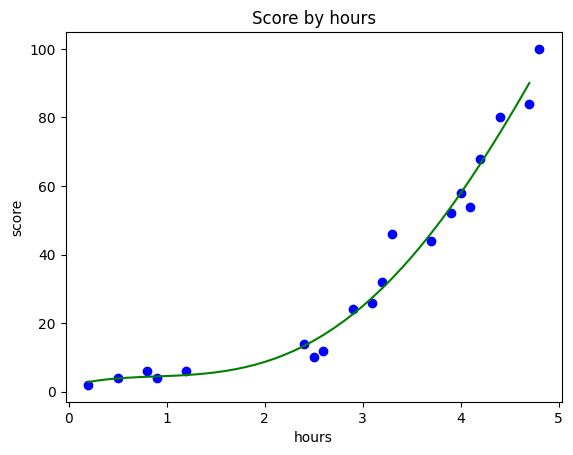

In [41]:
plt.scatter(x, y, color='blue')
plt.plot(x_range,lin_reg.predict(poly_reg.fit_transform(x_range)), color='green')
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

## 공부 시간에 따른 시험 성적 예측

In [42]:
reg.predict([[2]]) # 2시간을 공부 했을 때 선형 회기 모델 값

array([19.85348988])

In [43]:
lin_reg.predict(poly_reg.fit_transform([[2]])) # 2시간을 공부 했을때의 polynomial 값 예측

array([8.70559135])

In [44]:
lin_reg.score(x_poly, y)

0.9782775579000046